# Megacam transmission as well as air transparency

## Data taken from

- http://supernovae.in2p3.fr/snls_sdss/


## other info on filters
- http://www.cfht.hawaii.edu/Instruments/Imaging/Megacam/specsinformation.html

In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
from PIL import Image

In [90]:
files = ['CFHT_MegaPrime_Transmission.dat', \
         'CFHT_Primary_Transmission.dat', \
         'QE_camera_high_res_model.dat', \
         'SNIFS_extinction_buton2012_with_tl_X1_25.dat']

In [91]:
file_u =["u0.list","u1.list","u2.list","u3.list","u4.list","u5.list","u6.list","u7.list","u8.list","u9.list"]
file_g =["g0.list","g1.list","g2.list","g3.list","g4.list","g5.list","g6.list","g7.list","g8.list","g9.list"]
file_r =["r0.list","r1.list","r2.list","r3.list","r4.list","r5.list","r6.list","r7.list","r8.list","r9.list"]
file_i =["i0.list","i1.list","i2.list","i3.list","i4.list","i5.list","i6.list","i7.list","i8.list","i9.list"]
file_z =["z0.list","z1.list","z2.list","z3.list","z4.list","z5.list","z6.list","z7.list","z8.list","z9.list"]
file_y =["y0.list","y1.list","y2.list","y3.list","y4.list","y5.list","y6.list","y7.list","y8.list","y9.list"]

In [92]:
path_transmissions="all_products_v3_2/MegaCam_v3.2/"

## CFHT_MegaPrime_Transmission

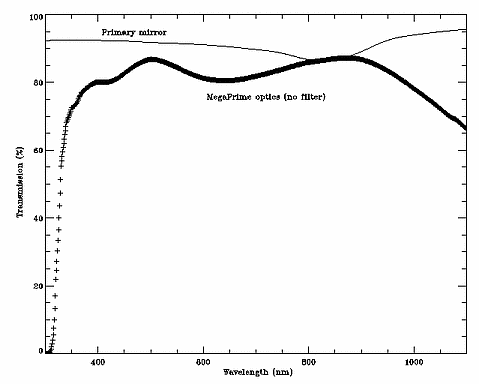

In [93]:
display(Image.open("Figures/MegaPrime-Optics-Transmission-75p.gif")) 

In [94]:
display("Figures/filters_transmissions.png")

'Figures/filters_transmissions.png'

In [95]:
df1=pd.read_table(os.path.join(path_transmissions,files[0]),sep=' ',names=["lambda","transm"],index_col=False)

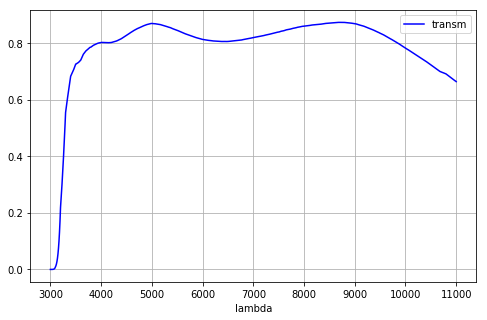

In [96]:
df1.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True)

## CFHT_Primary_Transmission

In [97]:
df2=pd.read_table(os.path.join(path_transmissions,files[1]),sep=' ',names=["lambda","transm"],index_col=False)

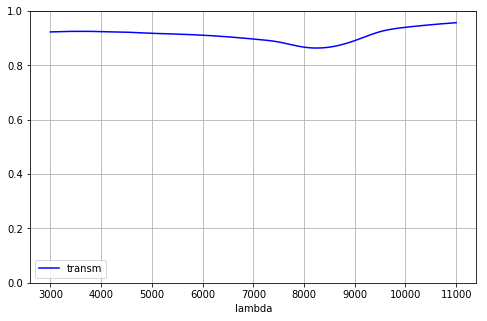

In [98]:
df2.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

## QE_camera_high_res_model.dat

In [99]:
df3=pd.read_table(os.path.join(path_transmissions,files[2]),sep=' ',names=["lambda","transm"],index_col=False)

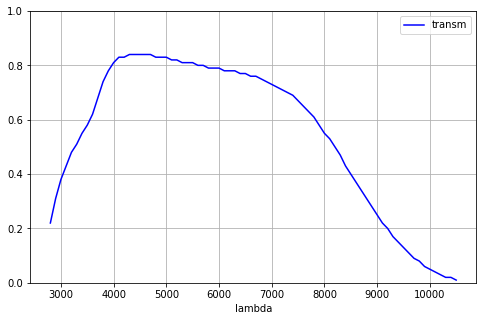

In [100]:
df3.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

## SNIFS_extinction_buton2012_with_tl_X1_25.dat

In [101]:
df4=pd.read_table(os.path.join(path_transmissions,files[3]),sep=' ',names=["lambda","transm"],index_col=False)

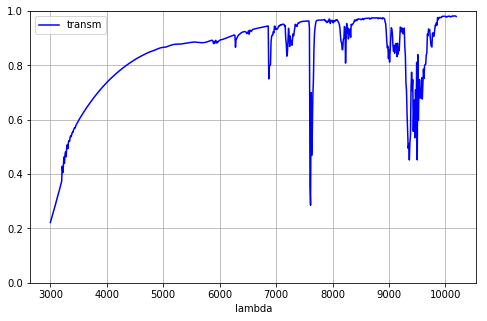

In [102]:
df4.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

# Filters 

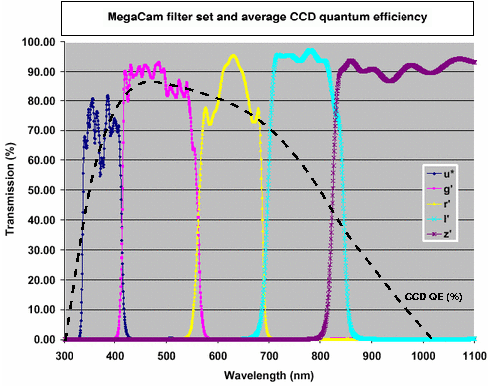

In [103]:
display(Image.open("Figures/MegaCamFilters+QE.gif")  )

In [104]:
dfu0=pd.read_table(os.path.join(path_transmissions,file_u[0]),sep=' ' ,skiprows=4,names=["lambda","u0"],index_col=False)
dfu1=pd.read_table(os.path.join(path_transmissions,file_u[1]),sep=' ' ,skiprows=4,names=["lambda","u1"],index_col=False)
dfu9=pd.read_table(os.path.join(path_transmissions,file_u[9]),sep=' ' ,skiprows=4,names=["lambda","u9"],index_col=False)

In [105]:
dfg0=pd.read_table(os.path.join(path_transmissions,file_g[0]),sep=' ' ,skiprows=4,names=["lambda","g0"],index_col=False)
dfg1=pd.read_table(os.path.join(path_transmissions,file_g[1]),sep=' ' ,skiprows=4,names=["lambda","g1"],index_col=False)
dfg9=pd.read_table(os.path.join(path_transmissions,file_g[9]),sep=' ' ,skiprows=4,names=["lambda","g9"],index_col=False)

In [106]:
dfr0=pd.read_table(os.path.join(path_transmissions,file_r[0]),sep=' ' ,skiprows=4,names=["lambda","r0"],index_col=False)
dfr1=pd.read_table(os.path.join(path_transmissions,file_r[1]),sep=' ' ,skiprows=4,names=["lambda","r1"],index_col=False)
dfr9=pd.read_table(os.path.join(path_transmissions,file_r[9]),sep=' ' ,skiprows=4,names=["lambda","r9"],index_col=False)

In [107]:
dfi0=pd.read_table(os.path.join(path_transmissions,file_i[0]),sep=' ' ,skiprows=4,names=["lambda","i0"],index_col=False)
dfi1=pd.read_table(os.path.join(path_transmissions,file_i[1]),sep=' ' ,skiprows=4,names=["lambda","i1"],index_col=False)
dfi9=pd.read_table(os.path.join(path_transmissions,file_i[9]),sep=' ' ,skiprows=4,names=["lambda","i9"],index_col=False)

In [108]:
dfz0=pd.read_table(os.path.join(path_transmissions,file_z[0]),sep=' ' ,skiprows=4,names=["lambda","z0"],index_col=False)
dfz1=pd.read_table(os.path.join(path_transmissions,file_z[1]),sep=' ' ,skiprows=4,names=["lambda","z1"],index_col=False)
dfz9=pd.read_table(os.path.join(path_transmissions,file_z[9]),sep=' ' ,skiprows=4,names=["lambda","z9"],index_col=False)

In [109]:
dfy0=pd.read_table(os.path.join(path_transmissions,file_y[0]),sep=' ' ,skiprows=4,names=["lambda","y0"],index_col=False)
dfy1=pd.read_table(os.path.join(path_transmissions,file_y[1]),sep=' ' ,skiprows=4,names=["lambda","y1"],index_col=False)
dfy9=pd.read_table(os.path.join(path_transmissions,file_y[9]),sep=' ' ,skiprows=4,names=["lambda","y9"],index_col=False)

In [110]:
#df_filters=pd.merge(dfu0,dfg0, how='left',left_on=["lambda","u0"],right_on=["lambda","g0"] )

(0, 1)

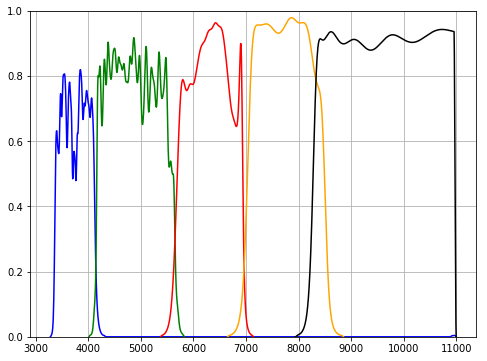

In [111]:
plt.figure(figsize=(8,6))
plt.plot(dfu0["lambda"],dfu0["u0"],color="b")
plt.plot(dfg0["lambda"],dfg0["g0"],color="g")
plt.plot(dfr0["lambda"],dfr0["r0"],color="r")
plt.plot(dfi0["lambda"],dfi0["i0"],color="orange")
plt.plot(dfz0["lambda"],dfz0["z0"],color="k")
#plt.plot(dfy0["lambda"],dfy0["y0"],color="grey")
plt.grid()
plt.ylim(0,1)

(0, 1)

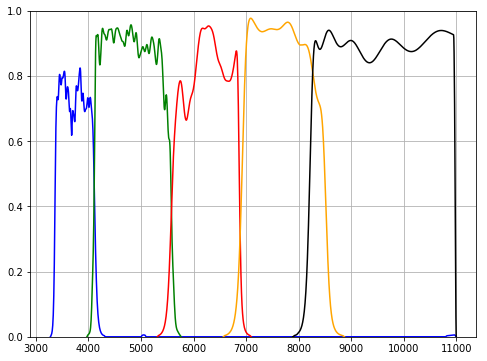

In [112]:
plt.figure(figsize=(8,6))
plt.plot(dfu9["lambda"],dfu9["u9"],color="b")
plt.plot(dfg9["lambda"],dfg9["g9"],color="g")
plt.plot(dfr9["lambda"],dfr9["r9"],color="r")
plt.plot(dfi9["lambda"],dfi9["i9"],color="orange")
plt.plot(dfz9["lambda"],dfz9["z9"],color="k")
#plt.plot(dfy9["lambda"],dfy9["y9"],color="grey")
plt.grid()
plt.ylim(0,1)